<h1>1. Introdução</h1>

Utilizar gráficos e relacionar dados para obter mais informações sobre determinado tópico é de suma importância. Hoje, a medida que o consumo de dados aumenta, a produção e armazenamento de informações trás consigo desafios e possibilidades que nos ajudam a descobrir relações e tendências.

Esse notebook é o produto de um projeto da disciplina de Probabilidade, do curso Bacharelado em Tecnologia da Informação da Universidade Federal do Rio Grande do Norte (**UFRN**). Nele, iremos utilizar dados abertos disponibilizados pela própria universidade para relacionarmos o comportamento de algumas variáveis ao longo dos anos.

Mais especificamente, iremos analisar e discutir, nas próximas sessões, o que é possível retirar a partir dos dados das **avaliações de docentes** do Instituto Metrópole Digital (**IMD**) e do Departamento de Informática e Matemática Aplicada (**DIMAP**) durante os anos de 2013 à 2017.

<h1>2. Processos de desenvolvimento</h1>

Após importar as bibliotecas necessárias para realizar a relação dos dados e geração de gráficos, iremos utilizar os dados vindos do [Portal de Dados Abertos da UFRN](http://dados.ufrn.br/). Esses dados então serão limpos e formatados para facilitar nos processos de manipulação.

Por decisão do grupo, foi feita a divisão dos dados do DIMAP e IMD logo cedo, para evitar que esses se confundam e assim causem, de alguma forma, imprecisão nos dados. Apesar dessa separação, nos estágios finais das etapas de manipulação e relação dos dados, eles voltam a ser integrados para que possam ser representados através de gráficos.

Os gráficos que possuem relação direta e que podem ser facilmente comparados afim de obter informações relevantes estão apresentados lado a lado.

Os dados de avaliação de um docente são:

* **Postura Profissional**
* **Atuação Profissional**

E para o discente:

* **Auto-avaliação**

In [1]:
#Coleção de bibliotecas que serão usadas para execução do projeto
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings

In [2]:
#Retirando warnings que estavam atrapalhando visualmente
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<h2>2.1 Dados da análise</h2>

Dentre os diversos grupos de dados oferecidos pelo portal, utilizaremos os dados do [grupo de ensino](http://dados.ufrn.br/group/ensino). Dentro desse grupo, como mencionado anteriormente, iremos analisar os docentes e como foram avaliados. Para isso, precisamos ter acesso aos conjuntos de dados que possuem essas informações. Sao eles:

* [Docentes](http://dados.ufrn.br/dataset/docentes)
* [Avaliação de Docência](http://dados.ufrn.br/dataset/avaliacoes-de-docencia)

O primeiro conjunto de dados contém os dados de todos os docentes da UFRN, incluindo lotação, que é o que usaremos para determinar onde ele trabalha (IMD ou DIMAP). Já o conjunto de dados referente a avaliação provém à nossa análise os dados referentes às avaliações à professores em diferentes turmas de todos os cursos, que serão então filtradas a partir dos dados obtidos pelo primeiro conjunto.

In [3]:
#http://dados.ufrn.br/dataset/docentes
docentes_url = "http://bit.do/docentes-ufrn1"
#http://dados.ufrn.br/dataset/avaliacoes-de-docencia
avaliacao_docentes_url = 'http://bit.do/avaliacoes-docencia-ufrn'

#Lista de todos os docentes da UFRN
docentes = pd.read_csv(docentes_url, sep=';')

#Lista de avaliações de docencia da UFRN
avaliacao_docentes = pd.read_csv(avaliacao_docentes_url, sep=';')

<h2>2.2 Preparação e limpeza de dados</h2>

Nessa seção, será feita a preparação dos dados "crus" que foram recebidos do portal da UFRN. Isso é necessário pois precisamos formatá-los de maneira que possamos usar mais facilmente as ferramentas que iremos utilizar. Além disso, podemos **filtrar** os dados que não serão relevantes para nossa análise.

<h3>2.2.1 Unificando conjuntos de dados</h3>
<p>Abaixo estaremos unificando os dois conjuntos de dados que obtivemos. Nesse mesmo processo, iremos filtrar apenas os dados que são relevantes para nossa análise.</p>

In [4]:
#Renomeando a coluna id_servidor para id_docente
docentes.rename(columns={'id_servidor': 'id_docente'}, inplace=True)

In [5]:
#Separando apenas as colunas que usaremos
colunas = ['id_docente', 'lotacao', 'ano', 'postura_profissional_media', 'atuacao_profissional_media', 'autoavaliacao_aluno_media', 'admissao']

#Merge com base na coluna id_docente que renomeamos
merge_docentes_avaliacao = pd.merge(docentes, avaliacao_docentes, on = 'id_docente')[colunas]

<h3>2.2.2 Separação de dados do IMD e DIMAP</h3>
<p>Como mencionado em seções anteriores, faremos a distinção entre os dados da avaliação do IMD e do DIMAP. Além disso, abreviaremos o nome para melhor manipulação dos dados.</p>

In [6]:
#Abreviando os itens da coluna 'lotacao' para melhor visualização
avaliacoes_imd = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "INSTITUTO METROPOLE DIGITAL"]
avaliacoes_imd.loc[:,'lotacao'] = "IMD"

avaliacoes_dimap = merge_docentes_avaliacao[merge_docentes_avaliacao.lotacao == "DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA"]
avaliacoes_dimap.loc[:,'lotacao'] = "DIMAP"

<h3>2.2.3 Definindo variáveis padrão</h3>
<p>O valor das variáveis abaixo serão utilizadas em diversas partes do código. Por isso, as criamos na cédula abaixo para que possamos reutilizá-las mais tarde.</p>

In [7]:
colunas = ["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"]
anos = [2013, 2014, 2015, 2016, 2017]

<h3>2.2.4 Preparando dados os gráficos</h3>
<p>Abaixo, os dados são preparados para que, nos 4 primeiros gráficos, consigam ser analisados os dados de admissão do docente a partir do ano somente. Isso se faz necessário porque os dados recebidos pela UFRN contém informações extras junto ao ano, que é o que realmente estamos buscando analisar.</p>

In [8]:
#IMD
#Selecionar apenas o ano de admissão do docente
#Transformando as células em tipo string
avaliacoes_imd.admissao = avaliacoes_imd.admissao.astype(str)

admissao_ano_imd = []
for index, value in enumerate(avaliacoes_imd.admissao):
    dt = value[:4]
    admissao_ano_imd.append(dt)

#transformando em inteiro as células
avaliacoes_imd.admissao = list(map(int, admissao_ano_imd))

#gerando tabela da média das avaliações por ano e por data de admissão por meio da função "pivot_table()"
avaliacao_media_imd = avaliacoes_imd.pivot_table(index=["admissao", "ano"], values=colunas, aggfunc=np.mean)

In [9]:
#DIMAP
#Selecionar apenas o ano de admissão do docente
#Transformando as células em tipo string
avaliacoes_dimap.admissao = avaliacoes_dimap.admissao.astype(str)

admissao_ano_dimap = []
for index, value in enumerate(avaliacoes_dimap.admissao):
    #recebendo apenas os quatros primeiros digitos, no caso, o ano de admissão
    dt = value[:4]
    admissao_ano_dimap.append(dt)
#transformando em inteiro as células

avaliacoes_dimap.admissao = list(map(int, admissao_ano_dimap))

#gerando tabela da média das avaliações por ano e por data de admissão por meio da função "pivot_table()"
avaliacao_media_dimap = avaliacoes_dimap.pivot_table(index=["admissao", "ano"], values=colunas, aggfunc=np.mean)

In [10]:
#Seleciona os dados das avaliações dos admitidos em 2012 e 2013
avaliacao_media_imd_2012 = avaliacao_media_imd.loc[2012, colunas]
avaliacao_media_imd_2013 = avaliacao_media_imd.loc[2013, colunas]
avaliacao_media_dimap_2012 = avaliacao_media_dimap.loc[2012, colunas]
avaliacao_media_dimap_2013 = avaliacao_media_dimap.loc[2013, colunas]

<h3>2.2.5 Juntos novamente</h3>
<p>Abaixo, as médias das avaliações dos docentes do **IMD** e do **DIMAP** são calculadas e os campos são renomeados para que possam ser reunidos em um só conjunto de dados sem que haja conflito. Isso será extremamente útil para a geração dos 3 últimos gráficos, que relacionam e comparam diretamente o resultado das avaliações dos dois departamentos.</p>

In [11]:
#Gerando tabela com as medias das avaliações do polo IMD
avaliacoes_imd_media = avaliacoes_imd.pivot_table(index="ano", values=colunas, aggfunc=np.mean)
avaliacoes_imd_media['ano'] = anos

#Renomeando colunas
avaliacoes_imd_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_imd',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_imd', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_imd'}, inplace=True)

In [12]:
#Gerando tabela com as medias das avaliações do polo DIMAP
avaliacoes_dimap_media = avaliacoes_dimap.pivot_table(index="ano", values=colunas, aggfunc=np.mean)
avaliacoes_dimap_media['ano'] = anos

#Renomeando colunas
avaliacoes_dimap_media.rename(columns={'postura_profissional_media': 'postura_profissional_media_dimap',
                                 'autoavaliacao_aluno_media' : 'autoavaliacao_aluno_media_dimap', 
                                 'atuacao_profissional_media' : 'atuacao_profissional_media_dimap'}, inplace=True)

In [13]:
#Tabela com todas as avaliações dos dois polos
avaliacoes_medias = pd.merge(avaliacoes_imd_media, avaliacoes_dimap_media)

<h2>2.3 Gráficos para análise</h2>

<p>Abaixo, através da biblioteca [matplotlib](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html), serão gerados os gráficos que irão render as análises das avaliações dos docentes do IMD e do DIMAP.</p>

<h3>2.3.1 Gráficos de admissão em 2012 e 2013</h3>
<p>Os gráficos abaixo apresentam os dados dos docentes admitidos na UFRN em 2012 e 20133, anos em que o IMD entrou em atividade. Ambos os gráficos apresentam as medições dos anos de 2013 a 2017 para cada categoria medida. Os valores para categoria representam médias das avaliações dos servidores que entraram na UFRN em 2012.</p>

<p>Foi pretendido com os dois gráficos analisar qual foi o progresso ao lonmgo dos anos daqueles que foram os primeiros professores vinculados ao IMD. Em contrapartida, é possível também analisar o desempenho do DIMAP, se ele foi afetado pela abertura do IMD e como se dá o progresso das avaliações dos docentes em um departamento que já existe há decadas em contraste com o IMD.</p>

In [14]:
anos = [2013,2014,2015,2016,2017]
labels = ["Postura profissional", "Atuação profissional", "Auto-avaliação (discente)"]
y_columns = ["postura_profissional_media","atuacao_profissional_media", "autoavaliacao_aluno_media"];


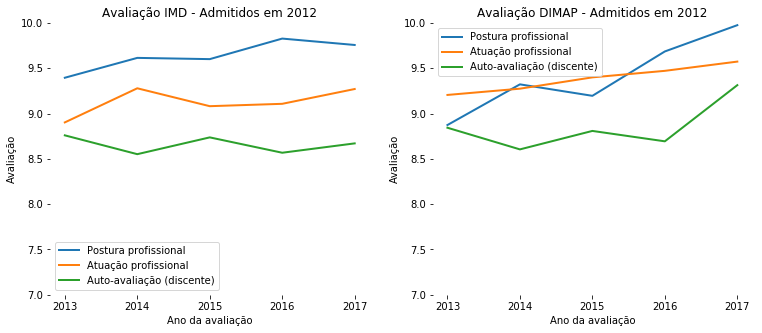

In [15]:
fig = plt.figure(figsize=(40,5))

#Primeiro gráfico mostrado abaixo referente ao IMD
ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

ax1 = fig.add_subplot(1, 6, 1)
ax1.plot(avaliacao_media_imd_2012.index, avaliacao_media_imd_2012[y_columns], linewidth=2)
ax1.legend(loc='best', labels=labels)

ax1.set_ylim(7,10)
ax1.set_xlabel('Ano da avaliação')
ax1.set_ylabel('Avaliação')
ax1.set_xticks(anos);

plt.title("Avaliação IMD - Admitidos em 2012");
for i in ["right", "top", "bottom", "left"]:
    ax1.spines[i].set_visible(False)


#Segundo gráfico mostrado abaixo referente ao DIMAP
ax2 = fig.add_subplot(1, 6, 2)
ax2.plot(avaliacao_media_dimap_2012.index,avaliacao_media_dimap_2012[y_columns], linewidth=2)
ax2.legend(loc='best', labels=labels)

ax2.set_ylim(7,10)
ax2.set_xlabel('Ano da avaliação')
ax2.set_ylabel('Avaliação')
ax2.set_xticks(anos);

plt.title("Avaliação DIMAP - Admitidos em 2012");
for i in ["right", "top", "bottom", "left"]:
    ax2.spines[i].set_visible(False)

plt.show()

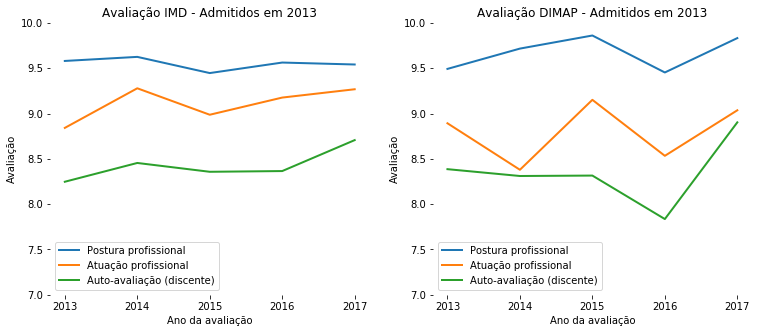

In [16]:
fig = plt.figure(figsize=(40,5))

#Terceiro gráfico mostrado abaixo referente ao IMD
ax3 = fig.add_subplot()
ax4 = fig.add_subplot()

ax3 = fig.add_subplot(1, 6, 1)
ax3.plot(avaliacao_media_imd_2013.index, avaliacao_media_imd_2013[y_columns], linewidth=2)
ax3.legend(loc=3, labels=labels)

ax3.set_ylim(7,10)
ax3.set_xlabel('Ano da avaliação')
ax3.set_ylabel('Avaliação')
ax3.set_xticks(anos);

plt.title("Avaliação IMD - Admitidos em 2013");
for i in ["right", "top", "bottom", "left"]:
    ax3.spines[i].set_visible(False)

#Quarto gráfico mostrado abaixo referente ao DIMAP
ax4 = fig.add_subplot(1, 6, 2)
ax4.plot(avaliacao_media_dimap_2013.index, avaliacao_media_dimap_2013[y_columns], linewidth=2)
ax4.legend(loc=3, labels=labels)

ax4.set_ylim(7,10)
ax4.set_xlabel('Ano da avaliação')
ax4.set_ylabel('Avaliação')
ax4.set_xticks(anos);

plt.title("Avaliação DIMAP - Admitidos em 2013");
for i in ["right", "top", "bottom", "left"]:
    ax4.spines[i].set_visible(False)

plt.show()

<h3>2.3.2 Gráficos por categoria</h3>

<p>Os gráficos abaixo apresentam a média das avaliações durante os anos para cada categoria nos dois departamentos. Isso permite que seja feita a análise do progresso individual de cada departamento. Além disso, os dados de ambos os departamentos são colocados lado a lado.</p>

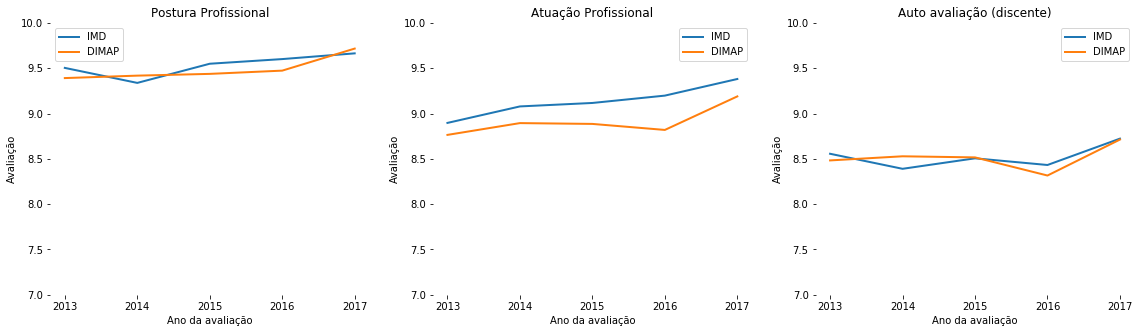

In [17]:
fig = plt.figure(figsize=(40,5))

attr_y_columns_postura = ["postura_profissional_media_imd", "postura_profissional_media_dimap"]
attr_y_columns_atuacao = ["atuacao_profissional_media_imd", "atuacao_profissional_media_dimap"]
attr_y_columns_autoavaliacao = ["autoavaliacao_aluno_media_imd", "autoavaliacao_aluno_media_dimap"]
attr_labels = ["IMD", "DIMAP"]

#Primeiro gráfico mostrado abaixo referente ao ano de 2013
ax5 = fig.add_subplot()
ax6 = fig.add_subplot()
ax7 = fig.add_subplot()

ax5 = fig.add_subplot(1, 6, 1)
ax5.plot(avaliacoes_medias.ano, avaliacoes_medias[attr_y_columns_postura], linewidth=2)
ax5.legend(loc='best', labels=attr_labels)

ax5.set_ylim(7,10)
ax5.set_xlabel('Ano da avaliação')
ax5.set_ylabel('Avaliação')
ax5.set_xticks(anos);

plt.title("Postura Profissional");

for i in ["right", "top", "bottom", "left"]:
    ax5.spines[i].set_visible(False)

ax6 = fig.add_subplot(1, 6, 2)
ax6.plot(avaliacoes_medias.ano, avaliacoes_medias[attr_y_columns_atuacao], linewidth=2)
ax6.legend(loc='best', labels=attr_labels)

ax6.set_ylim(7,10)
ax6.set_xlabel('Ano da avaliação')
ax6.set_ylabel('Avaliação')
ax6.set_xticks(anos);

plt.title("Atuação Profissional");

for i in ["right", "top", "bottom", "left"]:
    ax6.spines[i].set_visible(False)

ax7 = fig.add_subplot(1, 6, 3)
ax7.plot(avaliacoes_medias.ano, avaliacoes_medias[attr_y_columns_autoavaliacao], linewidth=2)
ax7.legend(loc='best', labels=attr_labels)

ax7.set_ylim(7,10)
ax7.set_xlabel('Ano da avaliação')
ax7.set_ylabel('Avaliação')
ax7.set_xticks(anos);

plt.title("Auto avaliação (discente)");

for i in ["right", "top", "bottom", "left"]:
    ax7.spines[i].set_visible(False)

plt.show()

<h1>3. Análise dos resultados</h1>

<h2>3.1. IMD</h2>

<p>No IMD, a Atuação Profissional referente ao ano de 2017 subiu cerca de **5,4%** em relação ao ano de 2013, enquanto a Postura Profissional subiu cerca de **1,6%** no mesmo período. Ainda entre 2013 e 2017, a Auto-avaliação **2%**.</p>

<p>Abaixo estão os calculos utilizados para inferir tais percentuais</p>

In [18]:
#Porcentagem da Atuação Profissional
atuacao_profissional_imd_2013 = avaliacoes_medias.atuacao_profissional_media_imd.loc[0]
atuacao_profissional_imd_2017 = avaliacoes_medias.atuacao_profissional_media_imd.loc[4]
atuacao_profissional_imd_2017 = (atuacao_profissional_imd_2017*100)/atuacao_profissional_imd_2013-100
atuacao_profissional_imd_2017

5.446912750066076

In [19]:
#Porcentagem da Postura Profissional
postura_profissional_imd_2013 = avaliacoes_medias.postura_profissional_media_imd.loc[0]
postura_profissional_imd_2017 = avaliacoes_medias.postura_profissional_media_imd.loc[4]
postura_profissional_imd_2017 = (postura_profissional_imd_2017*100)/postura_profissional_imd_2013-100
postura_profissional_imd_2017

1.6884588406683605

In [20]:
#Pocentagem da Auto-Avaliação
autoavaliacao_imd_2013 = avaliacoes_medias.autoavaliacao_aluno_media_imd.loc[0]
autoavaliacao_imd_2017 = avaliacoes_medias.autoavaliacao_aluno_media_imd.loc[4]
autoavaliacao_imd_2017 = (autoavaliacao_imd_2017*100)/autoavaliacao_imd_2013-100
autoavaliacao_imd_2017

1.9519942465014566

<h2>3.2. DIMAP</h2>

<p>No DIMAP, a Atuação Profissional referente ao ano de 2017 subiu cerca de **4,8%** em relação ao ano de 2013, enquanto a Postura Profissional subiu cerca de **3,4%** no mesmo período. Ainda entre 2013 e 2017, a Auto-avaliação **2,7%**.</p>

<p>Abaixo estão os calculos utilizados para inferir tais percentuais</p>

In [21]:
#Porcentagem da Atuação Profissional
atuacao_profissional_dimap_2013 = avaliacoes_medias.atuacao_profissional_media_dimap.loc[0]
atuacao_profissional_dimap_2017 = avaliacoes_medias.atuacao_profissional_media_dimap.loc[4]
atuacao_profissional_dimap_2017 = (atuacao_profissional_dimap_2017*100)/atuacao_profissional_dimap_2013-100
atuacao_profissional_dimap_2017

4.846548773531055

In [22]:
#Porcentagem da Postura Profissional
postura_profissional_dimap_2013 = avaliacoes_medias.postura_profissional_media_dimap.loc[0]
postura_profissional_dimap_2017 = avaliacoes_medias.postura_profissional_media_dimap.loc[4]
postura_profissional_dimap_2017 = (postura_profissional_dimap_2017*100)/postura_profissional_dimap_2013-100
postura_profissional_dimap_2017

3.4661322143237356

In [23]:
#Pocentagem da Auto-Avaliação
autoavaliacao_dimap_2013 = avaliacoes_medias.autoavaliacao_aluno_media_dimap.loc[0]
autoavaliacao_dimap_2017 = avaliacoes_medias.autoavaliacao_aluno_media_dimap.loc[4]
autoavaliacao_dimap_2017 = (autoavaliacao_dimap_2017*100)/autoavaliacao_dimap_2013-100
autoavaliacao_dimap_2017

2.715528897826175

<h1>4. Conclusão</h1>

Analisando os gráficos e percentuais brevemente, podemos tirar as seguintes conclusões:

* Os docentes que ingressaram no IMD nos anos de 2012 e 2013 não apresentaram progressos significativos ao longo dos anos, nem o índice de auto-avaliação dos seus discentes;

* O DIMAP não sofreu nenhum impacto significativo na avaliação dos seus docentes após a abertura do IMD. Pelo contrário: os docentes que ingressaram no departamento em 2012 melhoraram significativamente na avaliação de Postura Profissional, e aqueles que ingressaram em 2013 foram professores de turmas que obtiveram Auto-avaliações por parte dos discentes cada vez melhores;

* Em ambos os departamentos, os docentes receberam notas melhores com o passar dos anos, tanto na Postura Profissional quanto na Atuação Profissional;

* Referente a Postura Profissional, o IMD se manteve estável ao longo dos anos;

* Se compararmos as avaliações dos dois departamentos, elas estão no mesmo patamar. Sempre oscilam de maneira bastante semelhante.

* A Auto-avaliação dos alunos aumentou em ambos os departamentos ao longo dos anos;